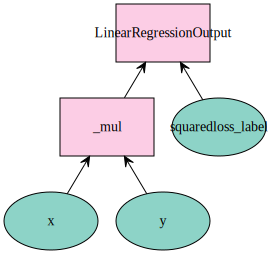

In [118]:
import mxnet as mx

# A simple network 
x = mx.sym.Variable('x')
y = mx.sym.Variable('y')
z = x * y
net = mx.sym.LinearRegressionOutput(z, name='squaredloss')
mx.viz.plot_network(net)


In [119]:
mod = mx.mod.Module(symbol=net, 
                    context=mx.cpu(),
                    data_names=[], 
                    label_names=['out'])

In [120]:
print(net.list_arguments())
print(net.list_outputs())

['x', 'y', 'squaredloss_label']
['squaredloss_output']


In [164]:
args = {}
args['x'] = mx.random.uniform(-0.1, 0.1, (1L,))
args['y'] = mx.random.uniform(-0.1, 0.1, (1L,))
args['squaredloss_label'] = mx.nd.array([9])
grad_args = {}
grad_args['x'] = mx.nd.zeros((1, ), ctx=mx.cpu())
grad_args['y'] = -mx.nd.zeros((1, ), ctx=mx.cpu())
ex = net.bind(ctx=mx.cpu(), args=args, args_grad=grad_args, grad_req='write')

In [165]:
learning_rate = 0.1
opt_x = []
opt_y = []
for i in range(20):
    opt_x.append(ex.arg_arrays[0].asnumpy())
    opt_y.append(ex.arg_arrays[1].asnumpy())
    ex.forward()
    print 'Output of the net at iteration ', i,  ':', str(ex.outputs[0].asnumpy())
    ex.backward()
    ex.arg_arrays[0] -= learning_rate * ex.grad_arrays[0]
    ex.arg_arrays[1] -= learning_rate * ex.grad_arrays[1]
print 'x = ', opt_x[-1]
print 'y = ', opt_y[-1]

Output of the net at iteration  0 : [-0.000364]
Output of the net at iteration  1 : [ 0.00062147]
Output of the net at iteration  2 : [ 0.0022627]
Output of the net at iteration  3 : [ 0.0081666]
Output of the net at iteration  4 : [ 0.02945608]
Output of the net at iteration  5 : [ 0.10600702]
Output of the net at iteration  6 : [ 0.37842703]
Output of the net at iteration  7 : [ 1.31224477]
Output of the net at iteration  8 : [ 4.10544491]
Output of the net at iteration  9 : [ 9.10783863]
Output of the net at iteration  10 : [ 8.91246223]
Output of the net at iteration  11 : [ 9.06918049]
Output of the net at iteration  12 : [ 8.9441328]
Output of the net at iteration  13 : [ 9.04434872]
Output of the net at iteration  14 : [ 8.96430588]
Output of the net at iteration  15 : [ 9.02841377]
Output of the net at iteration  16 : [ 8.97718048]
Output of the net at iteration  17 : [ 9.01819801]
Output of the net at iteration  18 : [ 8.98540497]
Output of the net at iteration  19 : [ 9.01165

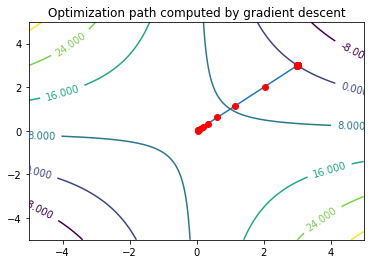

In [166]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (args['squaredloss_label'].asnumpy() - X*Y)

plt.figure()
CS = plt.contour(X, Y, Z, 6)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Optimization path computed by gradient descent')
plt.plot(opt_x,opt_y)
plt.plot(opt_x,opt_y,'ro')
plt.show()